In [1]:
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
train_images, test_images=train_images/255.0 , test_images/255.0


170508288/170498071 [==============================] - 2s 0us/step


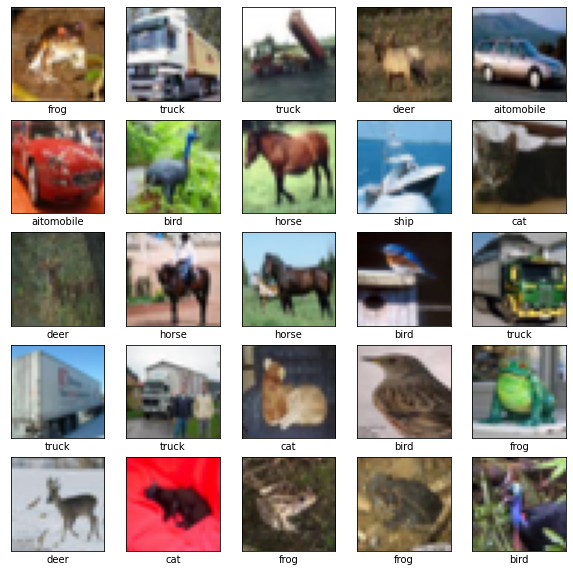

In [ ]:
class_names=['airplane','aitomobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()
  

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 8ms/step - loss: 1.5047 - accuracy: 0.4519 - val_loss: 1.2616 - val_accuracy: 0.5463
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1242 - accuracy: 0.6054 - val_loss: 1.0916 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9721 - accuracy: 0.6601 - val_loss: 0.9882 - val_accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8737 - accuracy: 0.6935 - val_loss: 0.9230 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8018 - accuracy: 0.7209 - val_loss: 0.9282 - val_accuracy: 0.6794
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7416 - accuracy: 0.7421 - val_loss: 0.8352 - val_accuracy: 0.7131
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6909 - accuracy: 0.7569 - val_loss: 0.8572 - val_ac

TypeError: ignored

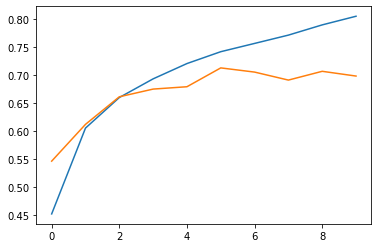

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel['Epoch']
plt.ylabel['Accuracy']
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc=model.evaluate(test_images,test_labels)

In [ ]:
print(test_acc)

NameError: ignored

In [ ]:
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 5.2 MB/s 
     |████████████████████████████████| 6.4 MB 40.9 MB/s 
     |████████████████████████████████| 840 kB 40.1 MB/s 
     |████████████████████████████████| 596 kB 39.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
     |████████████████████████████████| 213 kB 51.7 MB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 
     |████████████████████████████████| 1.1 MB 38.5 MB/s 
     |████████████████████████████████| 3.4 MB 39.6 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
     |████████████████████████████████| 120 kB 49.3 MB/s 
     |████████████████████████████████| 352 kB 46.1 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 47.7 MB 78 kB/s 
     |████████████████████████████████| 210 kB 49.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging 
logging.set_verbosity(logging.ERROR)

In [ ]:
spec=model_spec.get('efficientdet_lite0')

In [ ]:
train_data, validation_data, test_data=object_detector.DataLoader.from_csv('gs://cloud-ml-data/img/openimage/csv/salads_ml_use.csv')


In [ ]:
model=object_detector.create(train_data, model_spec=spec,batch_size=8, train_whole_model=True,validation_data=validation_data)

Epoch 1/50
21/21 [==============================] - 85s 2s/step - det_loss: 1.7705 - cls_loss: 1.1308 - box_loss: 0.0128 - reg_l2_loss: 0.0636 - loss: 1.8340 - learning_rate: 0.0090 - gradient_norm: 0.7511 - val_det_loss: 1.6642 - val_cls_loss: 1.1057 - val_box_loss: 0.0112 - val_reg_l2_loss: 0.0636 - val_loss: 1.7278
Epoch 2/50
21/21 [==============================] - 34s 2s/step - det_loss: 1.6078 - cls_loss: 1.0731 - box_loss: 0.0107 - reg_l2_loss: 0.0636 - loss: 1.6713 - learning_rate: 0.0100 - gradient_norm: 0.9529 - val_det_loss: 1.4982 - val_cls_loss: 0.9802 - val_box_loss: 0.0104 - val_reg_l2_loss: 0.0636 - val_loss: 1.5618
Epoch 3/50
21/21 [==============================] - 36s 2s/step - det_loss: 1.4472 - cls_loss: 0.9425 - box_loss: 0.0101 - reg_l2_loss: 0.0636 - loss: 1.5108 - learning_rate: 0.0099 - gradient_norm: 1.6389 - val_det_loss: 2.0606 - val_cls_loss: 1.5658 - val_box_loss: 0.0099 - val_reg_l2_loss: 0.0636 - val_loss: 2.1242
Epoch 4/50
21/21 [======================

In [ ]:
model_evaluate(test_data)

NameError: ignored

In [ ]:
model.export(export_dir='.')

In [ ]:
model.evaluate_tflite('model.tflite',test_data)